In [1]:
import anndata
import numpy as np
import pandas as pd
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams

In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [3]:
hic = anndata.read_h5ad("/home/micl/workspace/lmh_data/Lee2019/scHiC.h5ad")

_max = hic.X.max(axis=1)
hic.X = np.round((1/_max).reshape((1/_max).shape[0],1) * hic.X * 255, 0)

# hic.X = hic.X.argsort()
# _max = hic.X.max(axis=1)
# hic.X = np.round((1/_max).reshape((1/_max).shape[0],1) * hic.X * 255, 0)

hic

AnnData object with n_obs × n_vars = 4238 × 309581
    obs: 'domain'
    var: 'chrom', 'start'

In [4]:
hic.obs

,domain
cells,
190315_29yr_6_E11_AD008_ODC_10kb_contacts.cool,scHiC
181218_21yr_2_B11_AD002_Vip_10kb_contacts.cool,scHiC
190315_29yr_4_A3_AD006_L5_10kb_contacts.cool,scHiC
190315_21yr_6_F11_AD012_L23_10kb_contacts.cool,scHiC
181218_21yr_2_G12_AD010_MP_10kb_contacts.cool,scHiC
...,...
190305_21yr_2_H6_AD007_MP_10kb_contacts.cool,scHiC
190305_21yr_2_B1_AD001_OPC_10kb_contacts.cool,scHiC
190315_21yr_4_C7_AD010_Vip_10kb_contacts.cool,scHiC


In [5]:
hic.obs_names = hic.obs_names.str.split(r"[:_]").map(lambda x: '_'.join(x[:-2]))
hic.obs

,domain
cells,
190315_29yr_6_E11_AD008_ODC,scHiC
181218_21yr_2_B11_AD002_Vip,scHiC
190315_29yr_4_A3_AD006_L5,scHiC
190315_21yr_6_F11_AD012_L23,scHiC
181218_21yr_2_G12_AD010_MP,scHiC
...,...
190305_21yr_2_H6_AD007_MP,scHiC
190305_21yr_2_B1_AD001_OPC,scHiC
190315_21yr_4_C7_AD010_Vip,scHiC


In [6]:
hic_pca = pd.read_csv('/home/micl/workspace/lmh_data/Lee2019/BandNorm/embedding.txt', sep='\t')
hic_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
181218_21yr_2_A1_AD002_L23.txt,890.902763,83.059109,10.409427,3.083012,-49.354259,-32.600687,14.483734,-18.205280,-41.147020,26.329468,...,-75.735664,-3.820232,36.103463,-27.970191,42.335609,-3.901578,82.587591,-25.758200,-22.978127,96.463360
181218_21yr_2_A1_AD004_L23.txt,904.872698,118.306720,-19.466440,-60.319205,-21.003638,18.145742,13.801854,47.763996,-68.598821,-5.905531,...,49.290660,-67.283106,63.113846,-103.293280,326.277678,169.548997,2.469605,53.261816,-125.220526,152.974825
181218_21yr_2_A1_AD006_L6.txt,919.593825,161.310310,-32.728456,-73.150546,-40.742312,-20.245419,7.219258,23.709505,-42.157936,31.101920,...,-115.939807,134.374472,-152.814060,99.921896,-232.474914,98.563518,-60.032190,-6.316850,-56.298253,279.926732
181218_21yr_2_A1_AD008_ODC.txt,847.266348,-202.626888,68.867497,3.661814,9.588173,18.015434,2.675589,-2.031951,-41.755522,-14.324155,...,-2.210585,-21.356662,31.221962,1.551080,10.824116,-24.044750,12.866632,-16.734417,-11.687963,10.222472
181218_21yr_2_A1_AD010_L5.txt,886.009912,56.243458,10.304221,17.604349,-15.108784,12.878859,24.463045,24.169183,-40.195791,15.401737,...,34.124152,-22.576417,32.882791,18.596894,3.256004,-26.359388,11.476817,19.178504,29.270071,52.927332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190315_29yr_6_H9_AD004_ODC.txt,875.749342,-54.474977,62.063033,-3.718579,-26.856854,0.777472,4.115779,11.823778,5.298375,4.900289,...,-11.239674,2.795996,-4.207720,8.334254,-3.466066,3.272328,13.226099,-7.189493,-6.957192,2.088942
190315_29yr_6_H9_AD006_ODC.txt,869.931323,-76.770471,74.170357,-15.045151,-13.061829,20.001922,1.833363,11.767611,-9.040591,-5.036546,...,6.593132,8.693434,0.491497,-0.642918,0.887359,-0.908937,3.024385,-4.100478,7.214831,-5.355590
190315_29yr_6_H9_AD008_L4.txt,912.004776,184.210110,-38.544711,23.696057,-12.341722,20.049228,-4.100016,16.438967,-12.954493,-6.911907,...,-1.795838,1.604240,5.245884,-0.446017,9.135502,4.044941,-9.760894,2.112579,4.890044,0.847785
190315_29yr_6_H9_AD010_Astro.txt,894.382651,66.583788,10.889655,43.946956,85.647281,-63.064850,15.228112,-24.624083,-2.974911,31.133385,...,-4.625787,-19.812551,-10.425295,16.577477,0.681416,-6.781128,-5.698107,1.316502,-2.404099,2.969823


In [7]:
hic_pca.index = hic_pca.index.str.split(".").map(lambda x: x[0])
hic_pca = hic_pca.loc[hic.obs.index]
hic_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
cells,,,,,,,,,,,,,,,,,,,,,
190315_29yr_6_E11_AD008_ODC,871.781631,-72.333254,63.865209,-14.608258,-34.432074,9.476109,12.062783,9.782404,-21.597138,2.173983,...,1.046651,-17.042478,14.882015,-16.534655,1.391168,1.037403,0.538673,5.050615,-3.346549,-9.387006
181218_21yr_2_B11_AD002_Vip,899.521570,45.921524,24.171058,-49.777993,26.439545,22.897166,-15.028630,-20.633081,86.418502,7.517671,...,-20.367953,-41.389145,-14.781687,19.157262,-76.522537,25.832940,-19.830331,-19.379901,23.400929,-20.666634
190315_29yr_4_A3_AD006_L5,910.927240,176.876999,-52.440313,0.090915,-12.977546,14.780844,-3.253028,4.845430,-17.316657,-3.052136,...,1.430656,4.287518,-0.204909,5.015617,-5.961964,5.474950,6.702222,-5.824094,1.618371,-8.200665
190315_21yr_6_F11_AD012_L23,895.118014,113.303367,-10.757518,3.634128,-11.863942,21.572154,-18.377858,24.537773,-18.833498,-17.442221,...,-1.133421,7.014512,-2.394452,2.158924,-4.890967,-3.362944,12.538875,0.422184,16.263263,-0.436824
181218_21yr_2_G12_AD010_MP,858.744546,-225.178006,-95.737815,-36.902689,-7.173654,-26.212862,11.680092,-34.620812,-11.160733,12.925413,...,-8.080701,-5.339622,-5.127203,-28.472476,6.222498,35.060980,20.667730,-1.552784,8.225492,13.769378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190305_21yr_2_H6_AD007_MP,857.498332,-149.184302,-83.695044,-22.429992,-20.709749,-15.070855,8.958101,-7.510331,-34.261582,-36.159327,...,0.125220,16.544760,-9.807549,3.689828,-10.374477,-15.048891,-11.979496,5.252029,11.125054,3.911368
190305_21yr_2_B1_AD001_OPC,881.475294,-40.585908,40.154314,33.735235,51.666098,30.628314,-20.095340,10.426129,61.817539,-21.341536,...,-4.706073,-13.534714,4.893264,4.469470,-5.452570,6.212225,-1.512326,-2.814021,1.630196,-16.041625
190315_21yr_4_C7_AD010_Vip,900.474789,108.554408,-17.448108,39.083229,8.888875,44.529691,-28.568607,46.364711,71.446270,-17.628988,...,20.495377,-65.501270,-10.201661,-11.963391,-48.053869,-2.880644,-39.451852,0.294456,57.935249,23.469849


In [8]:
hic.obs["cell_type"] = hic.obs_names.str.split(r"[:_]").map(lambda x: x[5])
hic.obsm["X_pca"] = hic_pca.to_numpy()

del hic_pca; import gc; gc.collect();

In [9]:
hic = hic[hic.obs['cell_type'].isin(['Astro', 'Endo', 'ODC', 'OPC', 'Pvalb', 'Sst', 'Vip']),:]
hic.obs

,domain,cell_type
cells,,
190315_29yr_6_E11_AD008_ODC,scHiC,ODC
181218_21yr_2_B11_AD002_Vip,scHiC,Vip
190305_21yr_2_B4_AD002_Vip,scHiC,Vip
190315_21yr_4_G1_AD012_Astro,scHiC,Astro
181218_21yr_2_G7_AD004_Astro,scHiC,Astro
...,...,...
181218_21yr_3_D5_AD010_Vip,scHiC,Vip
190315_21yr_6_G12_AD006_OPC,scHiC,OPC
190305_21yr_2_B1_AD001_OPC,scHiC,OPC


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


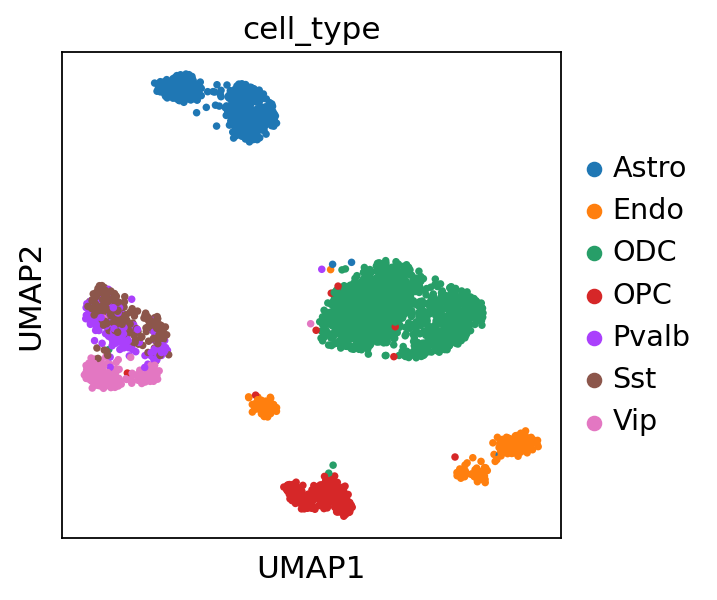

In [10]:
sc.pp.neighbors(hic, use_rep="X_pca", metric="cosine")
sc.tl.umap(hic)
sc.pl.umap(hic, color="cell_type")

In [11]:
rna = anndata.read_h5ad("/home/micl/workspace/lmh_data/Human_M1_10x/scRNA.h5ad")
rna.layers["counts"] = rna.X.copy()
rna

AnnData object with n_obs × n_vars = 22433 × 50281
    obs: 'cell_type', 'domain'
    layers: 'counts'

In [12]:
scglue.data.get_gene_annotation(
    rna, gtf="/home/micl/workspace/lmh_data/public/gencode.v19.annotation.gtf",
    gtf_by="gene_name"
)
rna = rna[:, rna.var.dropna(axis=0, how='all').index]
rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

,chrom,chromStart,chromEnd
DDX11L1,chr1,11868.0,14412.0
WASH7P,chr1,14362.0,29806.0
MIR1302-2,chr9,27656.0,30891.0
FAM138A,chr1,34553.0,36081.0
OR4G4P,chr1,52472.0,54936.0


In [13]:
sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=100, svd_solver="auto")

/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


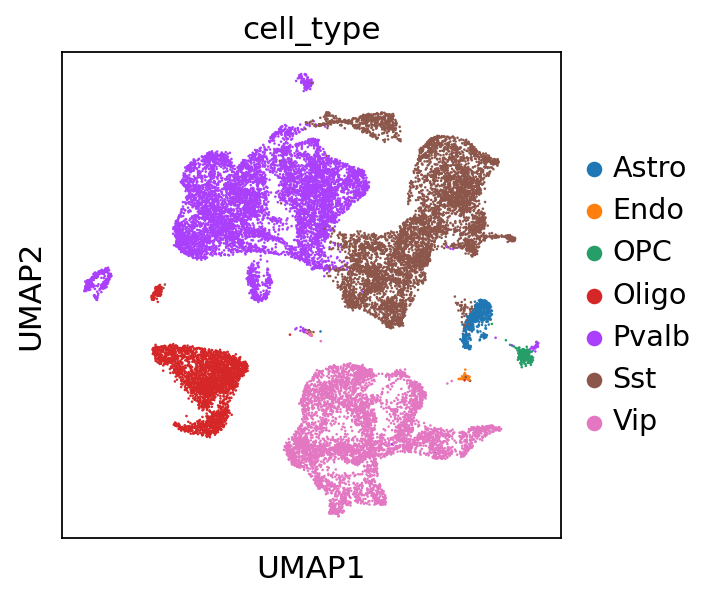

In [14]:
sc.pp.neighbors(rna, metric="cosine")
sc.tl.umap(rna)
sc.pl.umap(rna, color="cell_type")

In [15]:
hic.var

,chrom,start
chr1_0,chr1,0
chr1_10000,chr1,10000
chr1_20000,chr1,20000
chr1_30000,chr1,30000
chr1_40000,chr1,40000
...,...,...
chrY_59330000,chrY,59330000
chrY_59340000,chrY,59340000
chrY_59350000,chrY,59350000
chrY_59360000,chrY,59360000


In [16]:
hic.var = hic.var.rename(columns={'start':'chromStart'})
hic.var['chromEnd'] = hic.var['chromStart'] + 10000
hic.var

,chrom,chromStart,chromEnd
chr1_0,chr1,0,10000
chr1_10000,chr1,10000,20000
chr1_20000,chr1,20000,30000
chr1_30000,chr1,30000,40000
chr1_40000,chr1,40000,50000
...,...,...,...
chrY_59330000,chrY,59330000,59340000
chrY_59340000,chrY,59340000,59350000
chrY_59350000,chrY,59350000,59360000
chrY_59360000,chrY,59360000,59370000


In [17]:
import collections
import pybedtools

from pybedtools.cbedtools import Interval
from scglue.check import check_deps
from scglue.genomics import Bed
from scglue.utils import smart_tqdm
from typing import Any, Callable, Mapping, Optional, Union

def interval_dist(x: Interval, y: Interval) -> int:
    r"""
    Compute distance and relative position between two bed intervals

    Parameters
    ----------
    x
        First interval
    y
        Second interval

    Returns
    -------
    dist
        Signed distance between ``x`` and ``y``
    """
    if x.chrom != y.chrom:
        return np.inf * (-1 if x.chrom < y.chrom else 1)

    _start1, _end1 = (x.stop, x.start) if x.strand == '-' else (x.start, x.stop)
    _start2, _end2 = (y.stop, y.start) if y.strand == '-' else (y.start, y.stop)
    
#     d = min(abs(_start1-_start2), abs(_end1-_start2))
    d = _start1-_start2
    if abs(d) < 10000:
        d = 0
    return d
        
#     if x.start < y.stop and y.start < x.stop:
#         return 0
#     if x.stop <= y.start:
#         return x.stop - y.start - 1
#     if y.stop <= x.start:
#         return x.start - y.stop + 1

def window_graph(
        left: Union[Bed, str], right: Union[Bed, str], window_size: int,
        left_sorted: bool = False, right_sorted: bool = False,
        attr_fn: Optional[Callable[[Interval, Interval, float], Mapping[str, Any]]] = None
) -> nx.MultiDiGraph:
    r"""
    Construct a window graph between two sets of genomic features, where
    features pairs within a window size are connected.

    Parameters
    ----------
    left
        First feature set, either a :class:`Bed` object or path to a bed file
    right
        Second feature set, either a :class:`Bed` object or path to a bed file
    window_size
        Window size (in bp)
    left_sorted
        Whether ``left`` is already sorted
    right_sorted
        Whether ``right`` is already sorted
    attr_fn
        Function to compute edge attributes for connected features,
        should accept the following three positional arguments:

        - l: left interval
        - r: right interval
        - d: signed distance between the intervals

        By default no edge attribute is created.

    Returns
    -------
    graph
        Window graph
    """
    check_deps("bedtools")
    if isinstance(left, Bed):
        pbar_total = len(left)
        left = left.to_bedtool()
    else:
        pbar_total = None
        left = pybedtools.BedTool(left)
    if not left_sorted:
        left = left.sort(stream=True)
    left = iter(left)  # Resumable iterator
    if isinstance(right, Bed):
        right = right.to_bedtool()
    else:
        right = pybedtools.BedTool(right)
    if not right_sorted:
        right = right.sort(stream=True)
    right = iter(right)  # Resumable iterator

    attr_fn = attr_fn or (lambda l, r, d: {})
    if pbar_total is not None:
        left = smart_tqdm(left, total=pbar_total)
    graph = nx.MultiDiGraph()
    window = collections.OrderedDict()  # Used as ordered set
    searched_chrom = set()
    for l in left:
        searched_chrom.add(l.chrom)
        for r in list(window.keys()):  # Allow remove during iteration
            if r.chrom != l.chrom and r.chrom in searched_chrom:
                del window[r]
                continue
            d = interval_dist(l, r)
            if -window_size <= d <= window_size:
                graph.add_edge(l.name, r.name, **attr_fn(l, r, d))
        else:
            for r in right:  # Resume from last break
                d = interval_dist(l, r)
                window[r] = None
                if np.isinf(d):
                    break
                if -window_size <= d <= window_size:
                    graph.add_edge(l.name, r.name, **attr_fn(l, r, d))
    pybedtools.cleanup()
    return graph

import itertools
import networkx as nx

rna_bed = scglue.genomics.Bed(rna.var.assign(name=rna.var_names))
hic_bed = scglue.genomics.Bed(hic.var.assign(name=hic.var_names))

def _dist_power_decay(x: int) -> float:
    return ((x + 10000) / 10000) ** (-0.75)
graph = window_graph(
    rna_bed, hic_bed, window_size=20000,
    attr_fn=lambda l, r, d, s=1: {
        "dist": abs(d), "weight": _dist_power_decay(abs(d)), "sign": s
    }
)

rgraph = graph.reverse()
nx.set_edge_attributes(graph, "fwd", name="type")
nx.set_edge_attributes(rgraph, "rev", name="type")
graph = scglue.graph.compose_multigraph(graph, rgraph)

hvg_reachable = scglue.graph.reachable_vertices(graph, rna.var.query("highly_variable").index)
hic.var["highly_variable"] = [
    item in hvg_reachable for item in hic.var_names
]

all_features = set(itertools.chain.from_iterable(
    map(lambda x: x.var_names, [rna, hic])
))
for item in all_features:
    graph.add_edge(item, item, weight=1.0, sign=1, type="loop")

  0%|          | 0/29175 [00:00<?, ?it/s]

In [18]:
graph.number_of_nodes(), graph.number_of_edges()

(338756, 572160)

In [19]:
all(graph.has_node(gene) for gene in rna.var_names), \
all(graph.has_node(peak) for peak in hic.var_names), \
all(graph.has_edge(gene, gene) for gene in rna.var_names), \
all(graph.has_edge(peak, peak) for peak in hic.var_names), \
all(graph.has_edge(j, i) for i, j, _ in graph.edges)

(True, True, True, True, True)

In [20]:
hic.var.head()

,chrom,chromStart,chromEnd,highly_variable
chr1_0,chr1,0,10000,False
chr1_10000,chr1,10000,20000,False
chr1_20000,chr1,20000,30000,False
chr1_30000,chr1,30000,40000,False
chr1_40000,chr1,40000,50000,False


In [21]:
# rna.write("/home/micl/workspace/lmh_data/sclab/rna_preprocessed.h5ad", compression="gzip")
# hic.write("/home/micl/workspace/lmh_data/sclab/hic_preprocessed.h5ad", compression="gzip")
# nx.write_graphml(graph, "/home/micl/workspace/lmh_data/sclab/prior.graphml.gz")

In [22]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

scglue.models.configure_dataset(
    hic, "NB", use_highly_variable=True,
    use_rep="X_pca"
)

graph = graph.subgraph(itertools.chain(
    rna.var.query("highly_variable").index,
    hic.var.query("highly_variable").index
))

glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "hic": hic}, graph,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using GPU 1 as computation device.
[INFO] SCGLUEModel: Setting `graph_batch_size` = 8282
[INFO] SCGLUEModel: Setting `max_epochs` = 137
[INFO] SCGLUEModel: Setting `patience` = 12
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 6
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.497, 'g_kl': 0.019, 'g_elbo': 0.516, 'x_rna_nll': 0.72, 'x_rna_kl': 0.016, 'x_rna_elbo': 0.736, 'x_hic_nll': 0.804, 'x_hic_kl': 0.002, 'x_hic_elbo': 0.806, 'dsc_loss': 0.612, 'vae_loss': 1.563, 'gen_loss': 1.532}, val={'g_nll': 0.492, 'g_kl': 0.019, 'g_elbo': 0.511, 'x_rna_nll': 0.713, 'x_rna_kl': 0.016, 'x_rna_elbo': 0.729, 'x_hic_nll': 0.809, 'x_hic_kl': 0.002, 'x_hic_elbo': 0.811, 'dsc_loss': 0.589, 'vae_loss': 1.561, 'gen_loss': 1.531}, 11.3s elapsed
[INFO] SCGLUETrainer: [Epoch 20] train={'g_nll': 0.469, 'g_kl': 0.017, 'g_elbo': 0.486, 'x_rna_nll': 0.71, 'x_rna_kl': 0.018, '

2022-07-16 01:35:01,735 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "46"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...
[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (45, 19)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 8282
[INFO] SCGLUEModel: Setting `align_burnin` = 23
[INFO] SCGLUEModel: Setting `max_epochs` = 137
[INFO] SCGLUEModel: Setting `patience` = 12
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 6
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.436, 'g_kl': 0.014, 'g_elbo': 0.45, 'x_rna_nll': 0.707, 'x_rna_kl': 0.018, 'x_rna_elbo': 0.725, 'x_hic_nll': 0.795, 'x_hic_kl': 0.001, 'x_hic_elbo': 0.796, 'dsc_loss': 0.679, 'vae_loss': 1.54, 'gen_loss': 1.506}, val={'g_nll': 0.434, 'g_kl': 0.013

2022-07-16 01:43:16,285 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "46"...


In [23]:
dx = scglue.models.integration_consistency(
    glue, {"rna": rna, "hic": hic}, graph,
    count_layers={"rna": "counts"}
)
dx

[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:195: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(


[INFO] metacell_corr: Computing correlation on 10 common metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:195: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:599: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:195: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(


[INFO] metacell_corr: Computing correlation on 19 common metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:195: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:599: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:195: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(


[INFO] metacell_corr: Computing correlation on 48 common metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:195: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:599: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:195: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:195: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(


[INFO] metacell_corr: Computing correlation on 95 common metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:599: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:195: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:195: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(


[INFO] metacell_corr: Computing correlation on 179 common metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:599: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


,n_meta,consistency
0,10,0.011190
1,20,0.005132
2,50,0.010791
3,100,0.006061
4,200,0.009707


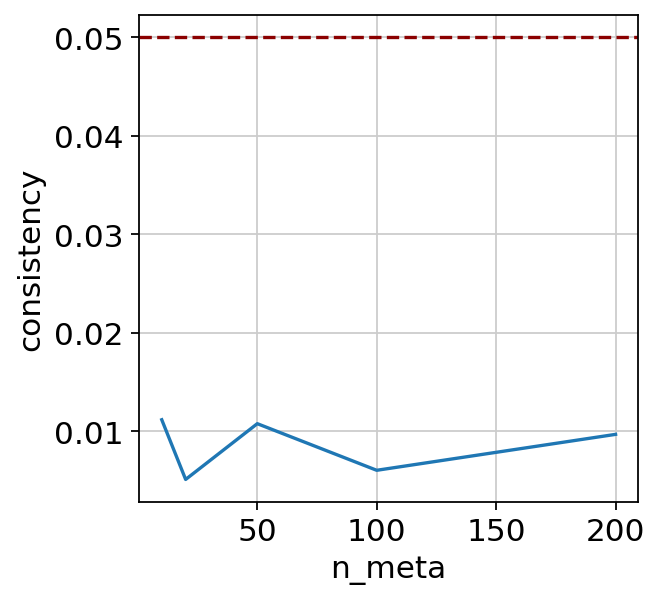

In [24]:
import seaborn as sns
_ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")

In [25]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
hic.obsm["X_glue"] = glue.encode_data("hic", hic)

combined = anndata.concat([rna, hic])

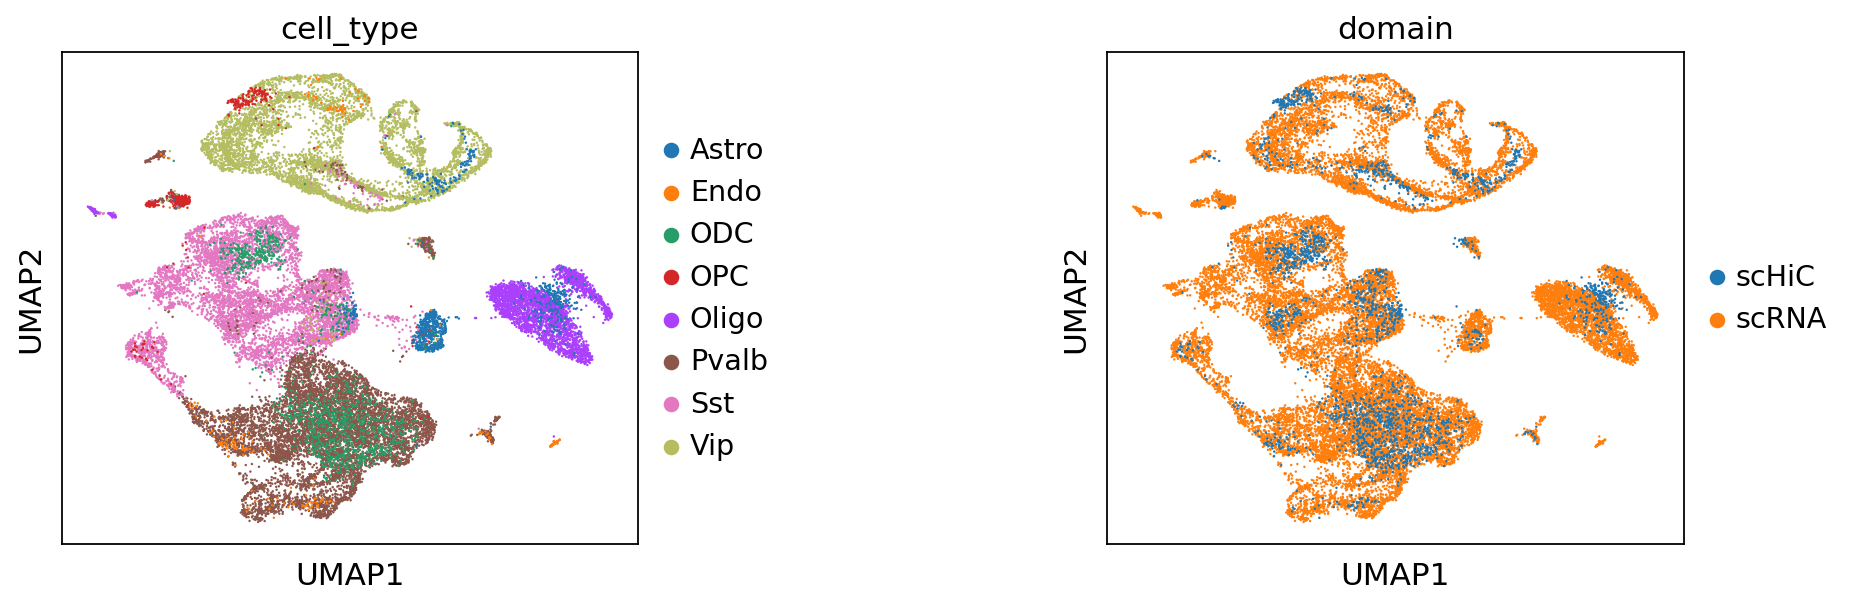

In [26]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65)

In [27]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined, n_components=3)
# sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65, dimensions=[(0, 1), (1, 2)])
combined

AnnData object with n_obs × n_vars = 25057 × 0
    obs: 'cell_type', 'domain', 'balancing_weight'
    uns: 'neighbors', 'umap', 'cell_type_colors', 'domain_colors'
    obsm: 'X_pca', 'X_umap', 'X_glue'
    obsp: 'distances', 'connectivities'

In [28]:
combined.obsm['X_umap']

array([[-3.305884  ,  0.3343295 ,  3.611109  ],
       [ 9.510035  ,  3.2927852 , -0.91047376],
       [ 0.42447424,  6.2528815 ,  1.0167179 ],
       ...,
       [ 0.5519604 , 11.685996  , -3.0851738 ],
       [ 2.634267  ,  9.960597  , -3.6058178 ],
       [-0.6251145 , 11.532909  ,  1.2031024 ]], dtype=float32)

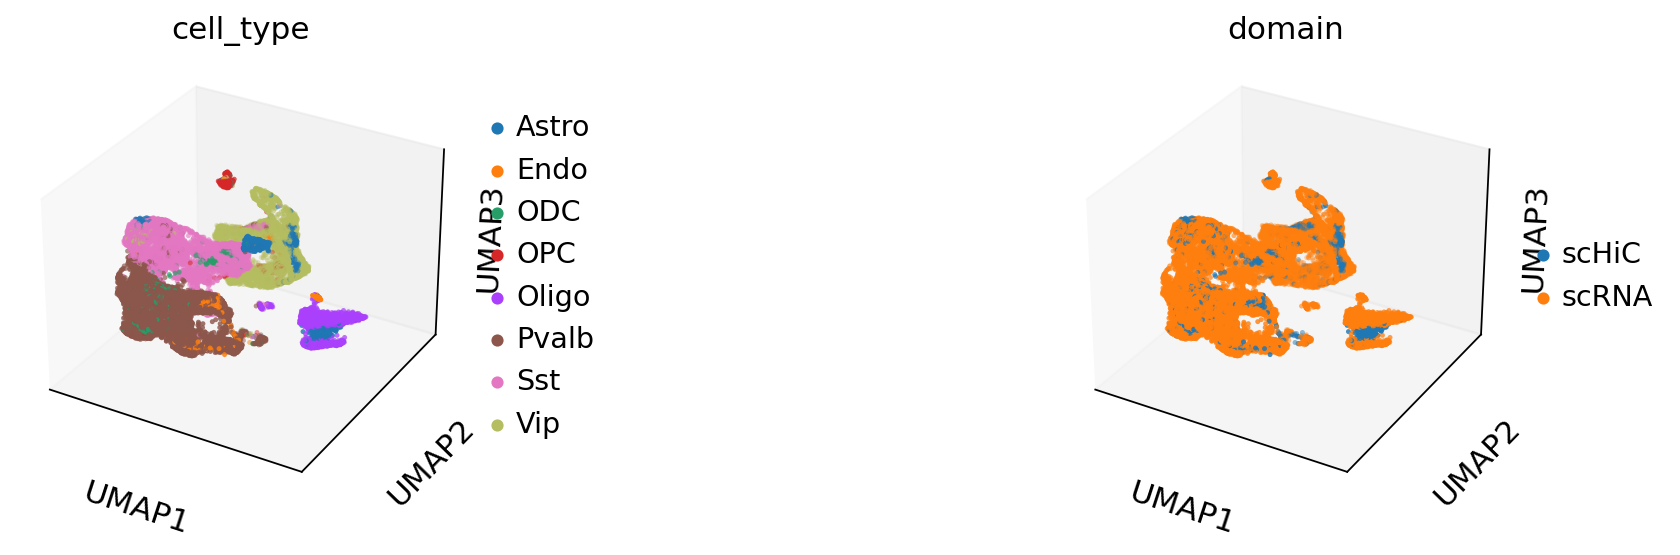

In [29]:
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65, projection='3d')

<IPython.core.display.Javascript object>


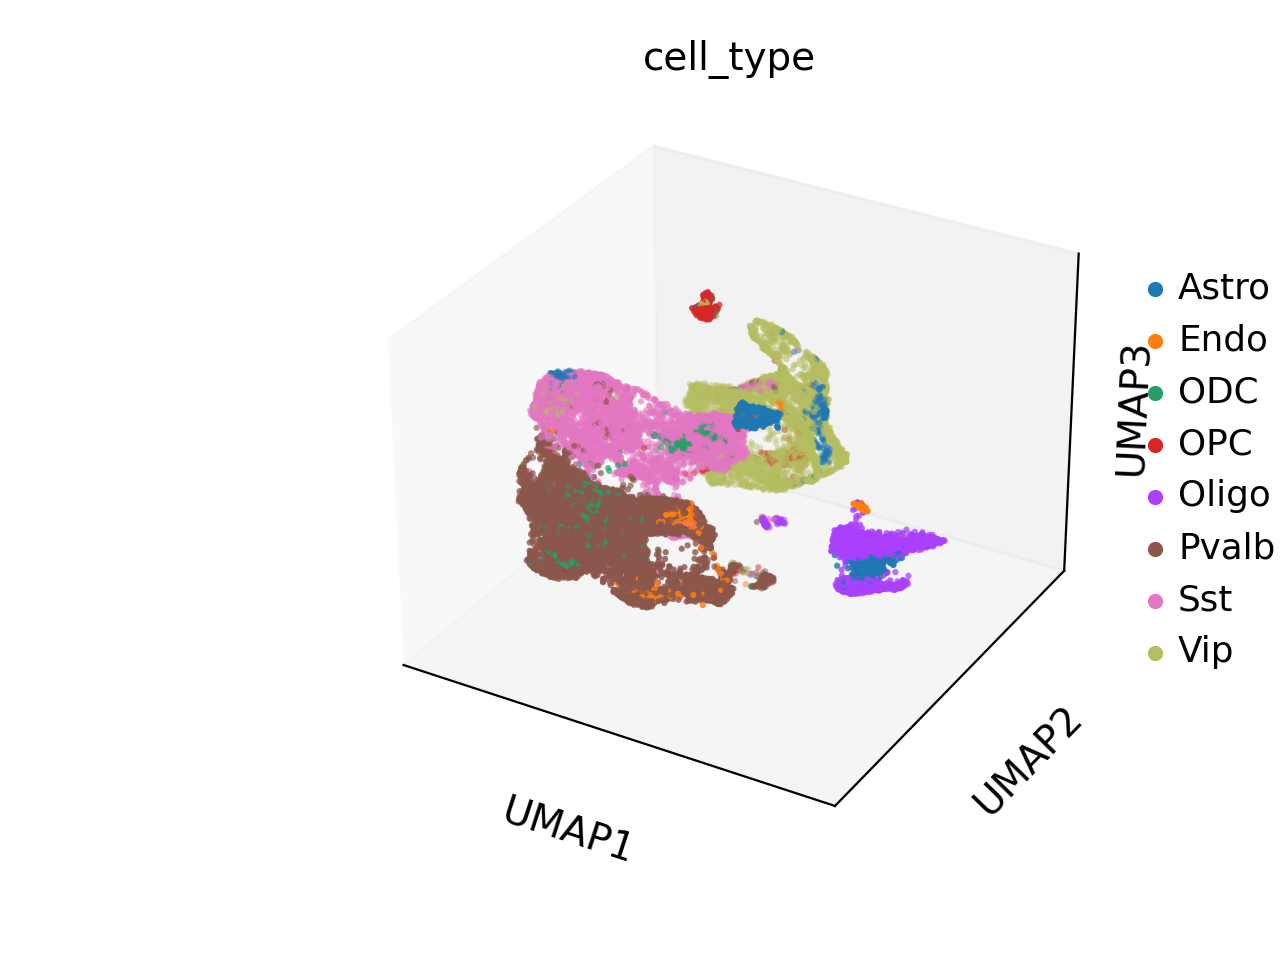

In [30]:
%matplotlib notebook
sc.pl.umap(combined, color=["cell_type"], projection='3d')